In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data = pd.read_csv('/content/customer_churn_dataset-training-master.csv')
df = pd.DataFrame(data)
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [ ]:
df = df.drop(columns = 'CustomerID')

In [ ]:
list(df.columns)

['Age',
 'Gender',
 'Tenure',
 'Usage Frequency',
 'Support Calls',
 'Payment Delay',
 'Subscription Type',
 'Contract Length',
 'Total Spend',
 'Last Interaction',
 'Churn']

In [ ]:
df.isna().sum()

Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [ ]:
df[df['Churn'].isna()]

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
199295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.drop(199295)
df = df.reset_index(drop = True)
df = df.drop(395337)
df = df.reset_index(drop = True)

In [ ]:
df.isna().sum()

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [ ]:
df[df['Churn'].isna()]

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn


In [ ]:
df = df.drop(395375)
df = df.reset_index(drop = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440830 entries, 0 to 440829
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                440830 non-null  float64
 1   Gender             440830 non-null  object 
 2   Tenure             440830 non-null  float64
 3   Usage Frequency    440830 non-null  float64
 4   Support Calls      440830 non-null  float64
 5   Payment Delay      440830 non-null  float64
 6   Subscription Type  440830 non-null  object 
 7   Contract Length    440830 non-null  object 
 8   Total Spend        440830 non-null  float64
 9   Last Interaction   440830 non-null  float64
 10  Churn              440830 non-null  float64
dtypes: float64(8), object(3)
memory usage: 37.0+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,440830.0,39.373178,12.442362,18.0,29.0,39.0,48.0,65.0
Tenure,440830.0,31.256323,17.255763,1.0,16.0,32.0,46.0,60.0
Usage Frequency,440830.0,15.807527,8.586245,1.0,9.0,16.0,23.0,30.0
Support Calls,440830.0,3.604448,3.070219,0.0,1.0,3.0,6.0,10.0
Payment Delay,440830.0,12.965712,8.258079,0.0,6.0,12.0,19.0,30.0
Total Spend,440830.0,631.615442,240.803008,100.0,480.0,661.0,830.0,1000.0
Last Interaction,440830.0,14.480847,8.596200,1.0,7.0,14.0,22.0,30.0
Churn,440830.0,0.567110,0.495476,0.0,0.0,1.0,1.0,1.0


most customers are male and around 54

most customers use the shop frequently

most customres delay their payments

the most subscribtion type is Premium

most customers have an annual contract and they spend more than the mean of the total spend feature

###EDA

<Axes: xlabel='Churn', ylabel='count'>

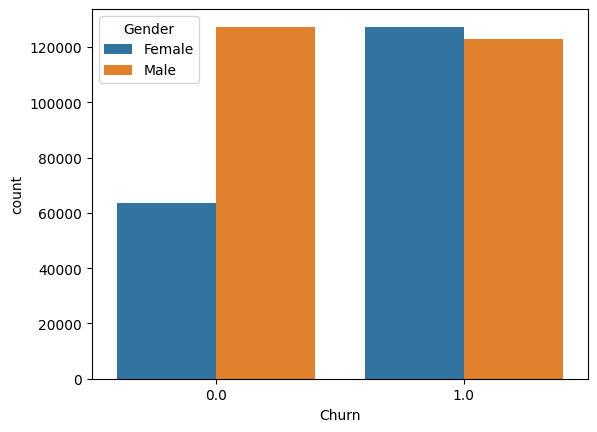

In [ ]:
import seaborn as sns
sns.countplot (x = 'Churn', hue = 'Gender', data = df)

<ipython-input-14-db1a074f3762>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
<ipython-input-14-db1a074f3762>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

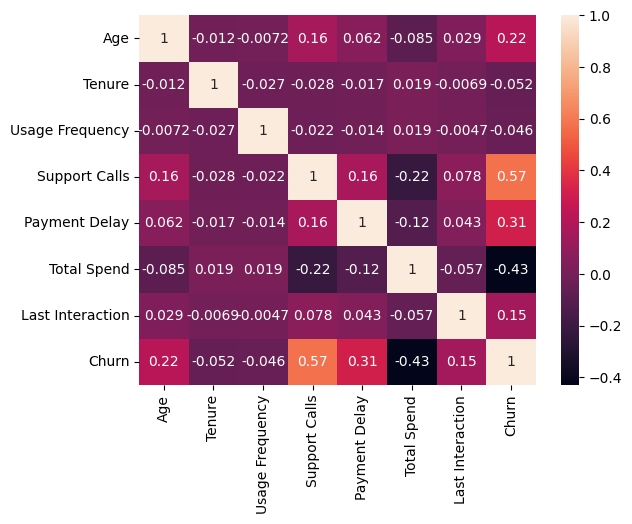

In [ ]:
df.corr()
sns.heatmap(df.corr(), annot = True)

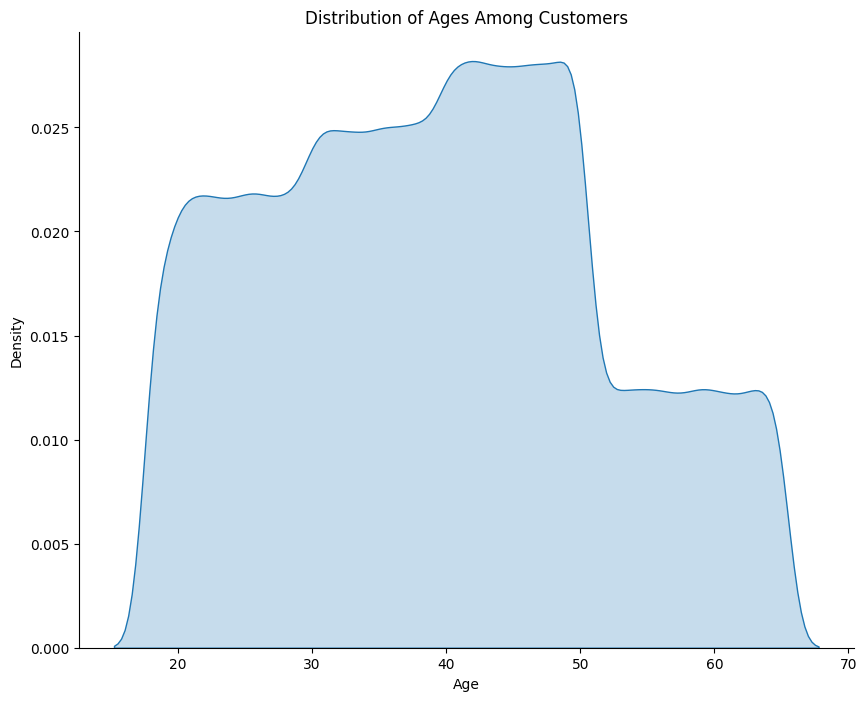

In [ ]:
plt.figure(figsize=(10,8))
sns.kdeplot(data = df , x = df.Age , fill = True , common_norm=False)
plt.title('Distribution of Ages Among Customers')
sns.despine()
plt.show()

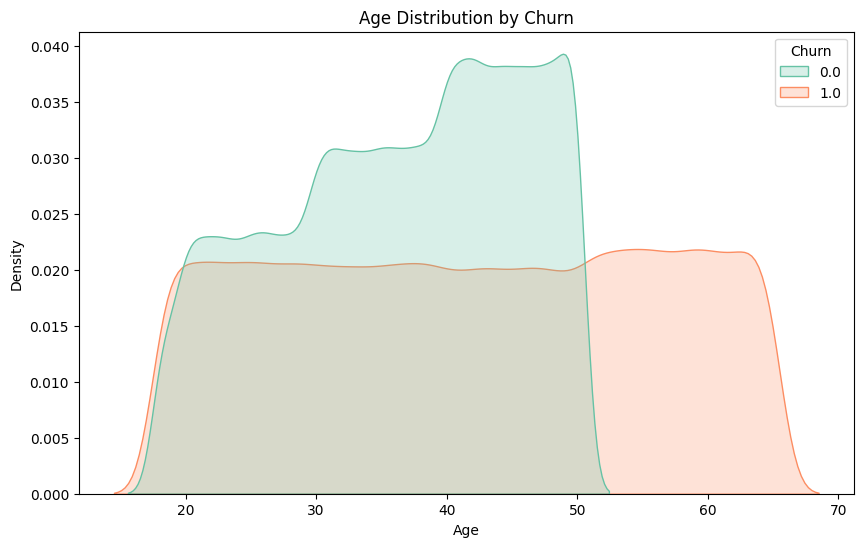

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Age', hue='Churn', common_norm=False, fill=True, palette='Set2')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution by Churn')
plt.show()

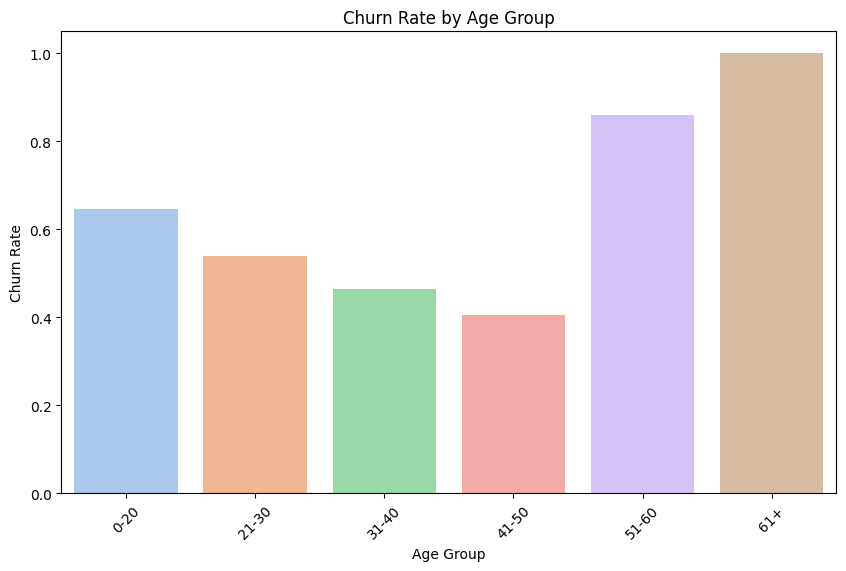

In [ ]:
age_bins = [0, 20, 30, 40, 50, 60, float('inf')]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
age_churn_rate = df.groupby('AgeGroup')['Churn'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=age_churn_rate.index, y=age_churn_rate.values, palette='pastel')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Age Group')
plt.xticks(rotation=45)
plt.show()

Age is normally distributed but is slighlty positively skewed which means we have more younger Customers

We have a significant number of customers in the 40-50 age range, with a smaller but still substantial group in the 20-30 age range

as you can see almost half of the customers in the 20-30 group Churn but the churn rate drops for the next age groups until 41-50 age group

Everyone who is older than 60 Churn!!!

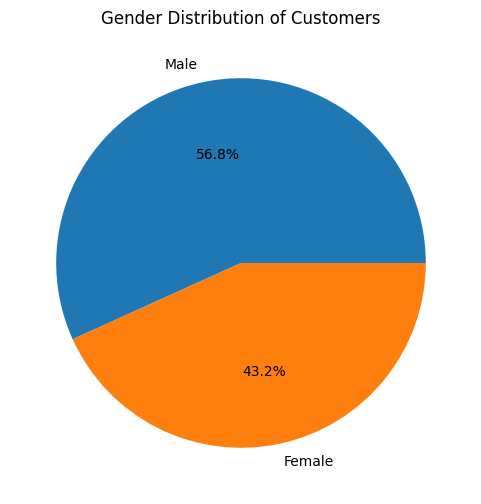

In [ ]:
plt.figure(figsize=(6, 6))
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution of Customers')
plt.show()

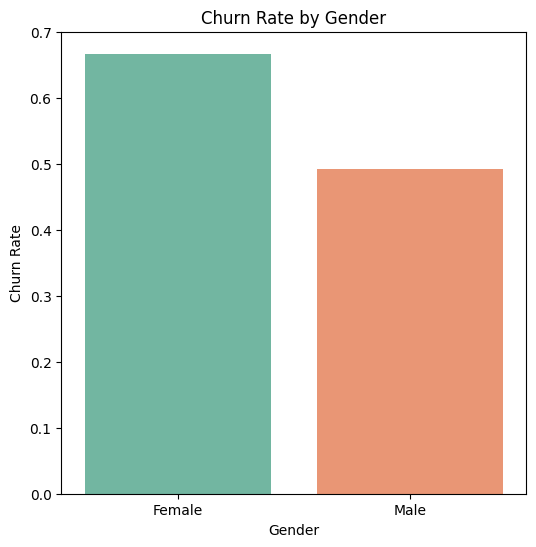

In [ ]:
gender_churn_rate = df.groupby('Gender')['Churn'].mean()

plt.figure(figsize=(6, 6))
sns.barplot(x=gender_churn_rate.index, y=gender_churn_rate.values, palette='Set2')
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Gender')
plt.show()

In [ ]:
average_support_calls = df['Support Calls'].mean()
print(f"Average Number of Support Calls: {average_support_calls}")

Average Number of Support Calls: 3.6044484268312047


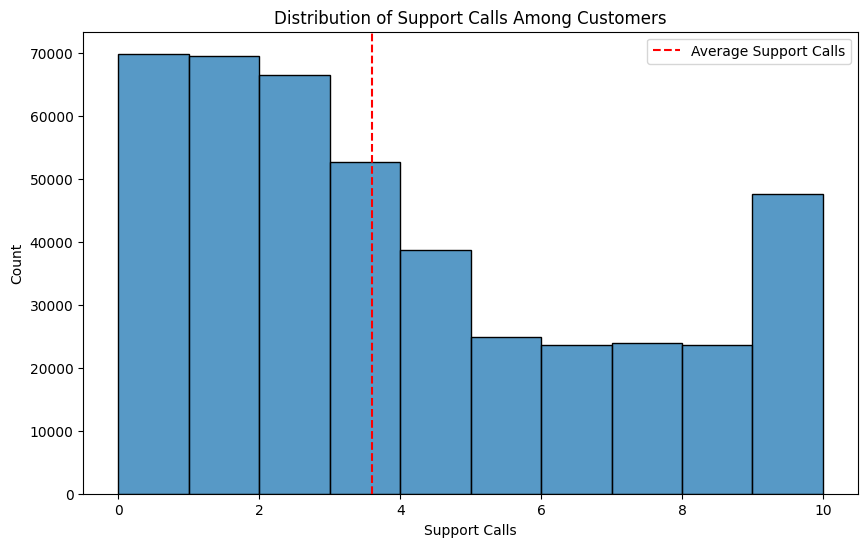

In [ ]:
plt.figure(figsize = (10,6))
sns.histplot(data = df , x = 'Support Calls' , bins = 10  )
plt.axvline(average_support_calls, color='red', linestyle='dashed', label='Average Support Calls')
plt.xlabel('Support Calls')
plt.ylabel('Count')
plt.title('Distribution of Support Calls Among Customers')
plt.legend()
plt.show()

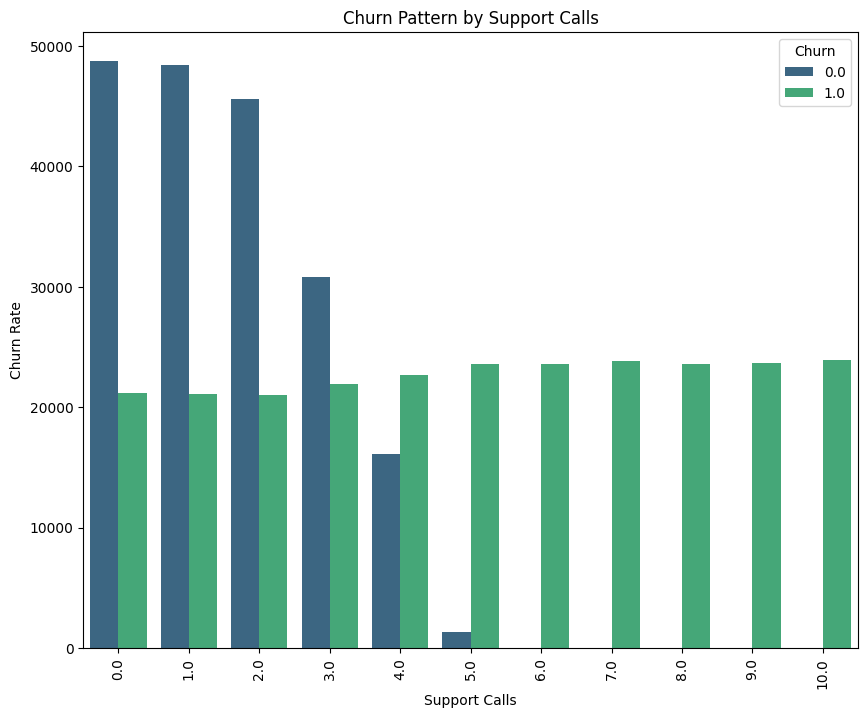

In [ ]:
plt.figure(figsize = (10,8))
sns.countplot(data = df , x = 'Support Calls' , hue = 'Churn', palette = 'viridis')
plt.xlabel('Support Calls')
plt.ylabel('Churn Rate')
plt.title('Churn Pattern by Support Calls')
plt.xticks(rotation=90)
plt.show()

on average customers call the support 3 times

support calls are much higher from 0 to 3 times for each customer and in this range the calls seem to be successful due to the churn rate of this customers

as the support calls go higher the churn rates go higher too, to the point that for more than 5 calls there are no non churned customers and it seems the supporters are not successful in making the cutomer's problem go away

###Encoding

In [ ]:
df = pd.get_dummies(df)
display(df.head(3))

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn,Gender_Female,Gender_Male,...,Subscription Type_Standard,Contract Length_Annual,Contract Length_Monthly,Contract Length_Quarterly,AgeGroup_0-20,AgeGroup_21-30,AgeGroup_31-40,AgeGroup_41-50,AgeGroup_51-60,AgeGroup_61+
0,30.0,39.0,14.0,5.0,18.0,932.0,17.0,1.0,1,0,...,1,1,0,0,0,0,1,0,0,0
1,65.0,49.0,1.0,10.0,8.0,557.0,6.0,1.0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,55.0,14.0,4.0,6.0,18.0,185.0,3.0,1.0,1,0,...,0,0,0,1,0,0,0,0,1,0


###Train_Test_Spilt

In [ ]:
X = df.drop(columns = ["Churn"])
y = df["Churn"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape)

(352664, 21) (88166, 21)


###Scale

In [ ]:
from sklearn.preprocessing import StandardScaler
model_scale = StandardScaler()
model_scale.fit(x_train)
x_train_scale = model_scale.transform(x_train)
x_test_scale = model_scale.transform(x_test)
print(x_train)
print(x_train_scale)

###Train Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Khởi tạo model
model_knn = KNeighborsClassifier()
# Train model
model_knn.fit(x_train_scale, y_train)

KNeighborsClassifier()

###Evaluate Model

In [ ]:
y_pred = model_knn.predict(x_test_scale)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     38122
         1.0       0.99      0.93      0.96     50044

    accuracy                           0.96     88166
   macro avg       0.96      0.96      0.96     88166
weighted avg       0.96      0.96      0.96     88166



In [ ]:
y_pred = model_knn.predict(x_train_scale)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97    152709
         1.0       1.00      0.95      0.97    199955

    accuracy                           0.97    352664
   macro avg       0.97      0.97      0.97    352664
weighted avg       0.97      0.97      0.97    352664



###SVC

Score testing of model svm is : 0.9802077898509629


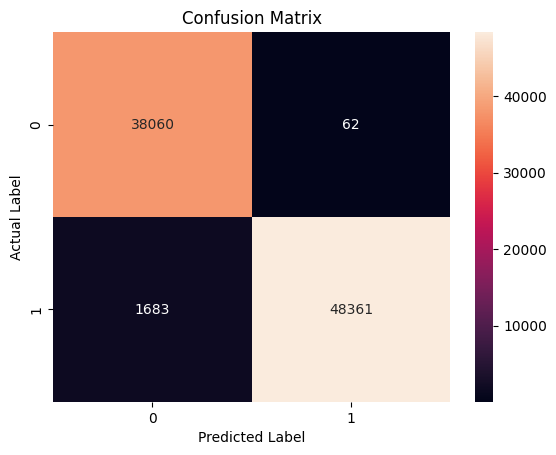

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     38122
         1.0       1.00      0.97      0.98     50044

    accuracy                           0.98     88166
   macro avg       0.98      0.98      0.98     88166
weighted avg       0.98      0.98      0.98     88166



In [ ]:
# import lib
from sklearn.svm import SVC #C Trong SVC là classifier, nếu hồi quy thì là SVR
import matplotlib.pyplot as plt
#TODO train
# step 1.  khởi tạo model
model_svm = SVC()
# step 2: train model
model_svm.fit(x_train_scale, y_train)

# Evalute model
y_pred = model_svm.predict(x_test_scale)
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
score = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Score testing of model svm is : {}".format(score))
ax = plt.subplot()
sns.heatmap(cm, annot = True, fmt = "g", ax = ax)
ax.set_xlabel("Predicted Label")
ax.set_ylabel("Actual Label")
ax.set_title("Confusion Matrix")
plt.show()
print(classification_report(y_test, y_pred))

Accuracy of testing is: 0.9999206043145884
[[38119     3]
 [    4 50040]]
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     38122
         1.0       1.00      0.97      0.98     50044

    accuracy                           0.98     88166
   macro avg       0.98      0.98      0.98     88166
weighted avg       0.98      0.98      0.98     88166



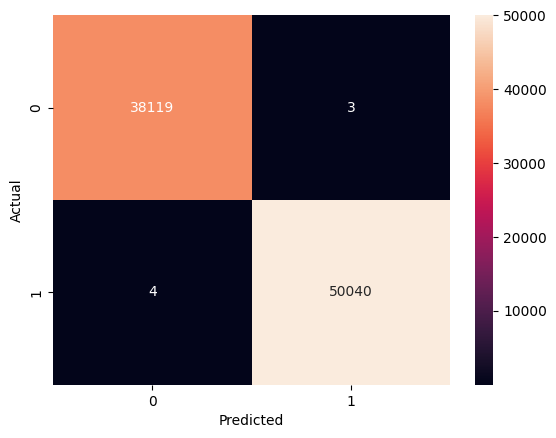

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Decision Tree
# Khởi tạo model
model_dt = DecisionTreeClassifier()
# train model
model_dt.fit(x_train_scale, y_train)

import matplotlib.pyplot as plt
# Predict
y_pred_test = model_dt.predict(x_test_scale)
# evaluate by metrics
from sklearn.metrics import accuracy_score, confusion_matrix
acc_test = accuracy_score(y_test, y_pred_test)
print("Accuracy of testing is: {}".format(acc_test))
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
sns.heatmap(cm, annot = True, fmt = "g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred))

Accuracy of testing is: 0.9987410112741874
[[38121     1]
 [  110 49934]]
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     38122
         1.0       1.00      0.97      0.98     50044

    accuracy                           0.98     88166
   macro avg       0.98      0.98      0.98     88166
weighted avg       0.98      0.98      0.98     88166



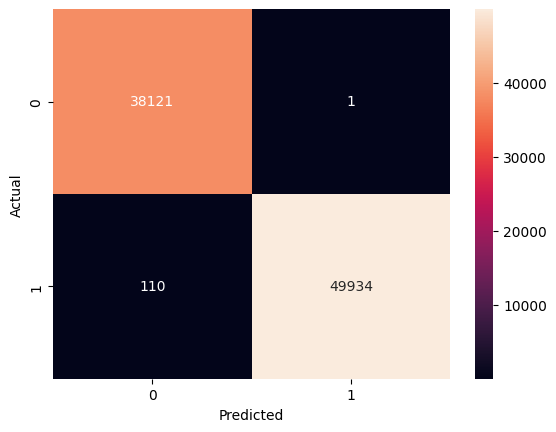

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
# Khởi tạo model
model_dt = RandomForestClassifier()
# train model
model_dt.fit(x_train_scale, y_train)

import matplotlib.pyplot as plt
# Predict
y_pred_test = model_dt.predict(x_test_scale)
# evaluate by metrics
from sklearn.metrics import accuracy_score, confusion_matrix
acc_test = accuracy_score(y_test, y_pred_test)
print("Accuracy of testing is: {}".format(acc_test))
cm = confusion_matrix(y_test, y_pred_test)
print(cm)
sns.heatmap(cm, annot = True, fmt = "g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred))